In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('insurance.csv')

# Display basic information
print("📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 rows:")
display(df.head())

print("\n📋 Dataset Info:")
df.info()

print("\n📈 Statistical Summary:")
display(df.describe())

print("\n❓ Missing Values:")
print(df.isnull().sum())

📊 Dataset Shape: (1338, 8)

🔍 First 5 rows:


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB

📈 Statistical Summary:


,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010



❓ Missing Values:
index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [3]:
# Create a copy for preprocessing
data = df.copy()

# Display unique values in categorical columns
print("🔤 Categorical Variables:")
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n✅ Data preprocessing completed!")
print("📊 Processed data overview:")
display(data.head())

🔤 Categorical Variables:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']
Encoded sex: {'female': np.int64(0), 'male': np.int64(1)}
Encoded smoker: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded region: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}

✅ Data preprocessing completed!
📊 Processed data overview:


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520


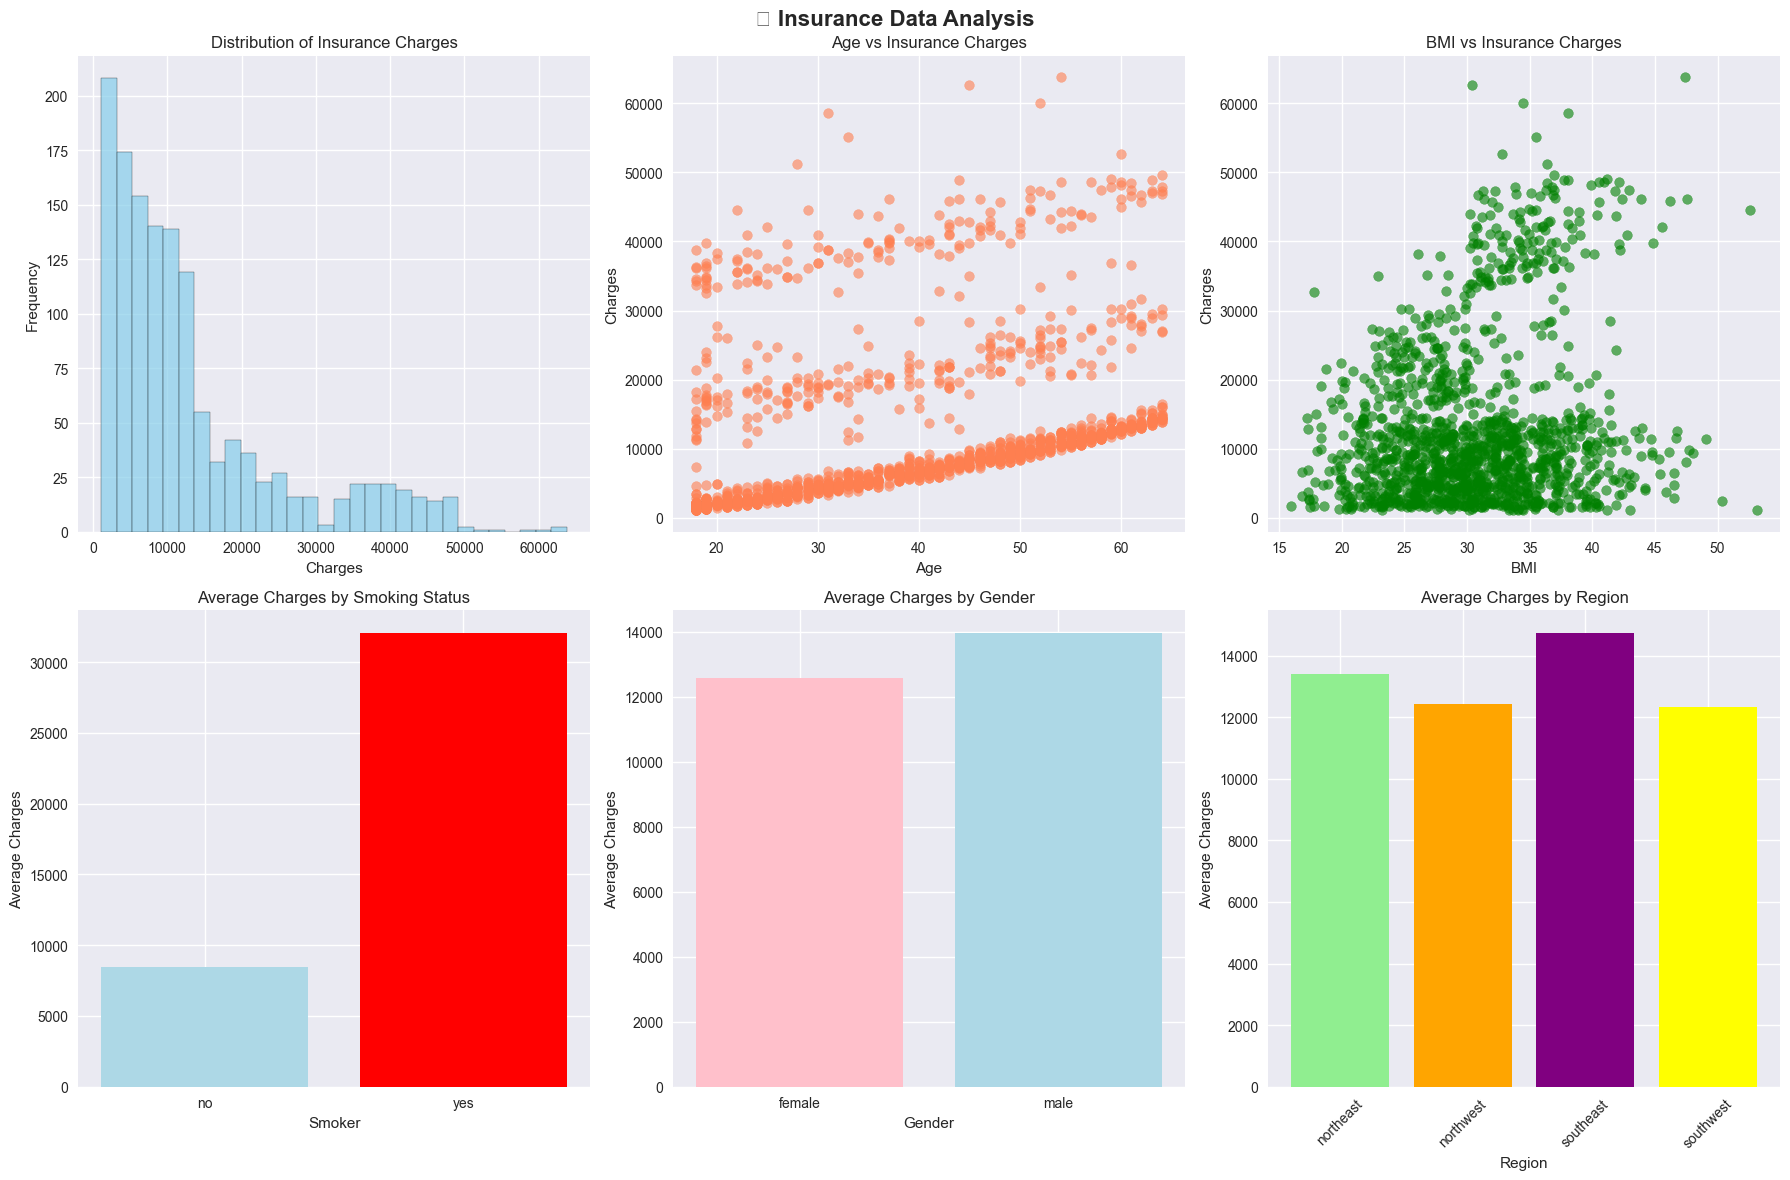

In [4]:
# Set up the plotting style
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Insurance Data Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of charges
axes[0,0].hist(data['charges'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Insurance Charges')
axes[0,0].set_xlabel('Charges')
axes[0,0].set_ylabel('Frequency')

# 2. Age vs Charges
axes[0,1].scatter(data['age'], data['charges'], alpha=0.6, color='coral')
axes[0,1].set_title('Age vs Insurance Charges')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Charges')

# 3. BMI vs Charges
axes[0,2].scatter(data['bmi'], data['charges'], alpha=0.6, color='green')
axes[0,2].set_title('BMI vs Insurance Charges')
axes[0,2].set_xlabel('BMI')
axes[0,2].set_ylabel('Charges')

# 4. Smoking impact (using original data for clear labels)
smoker_charges = df.groupby('smoker')['charges'].mean()
axes[1,0].bar(smoker_charges.index, smoker_charges.values, color=['lightblue', 'red'])
axes[1,0].set_title('Average Charges by Smoking Status')
axes[1,0].set_xlabel('Smoker')
axes[1,0].set_ylabel('Average Charges')

# 5. Gender impact
gender_charges = df.groupby('sex')['charges'].mean()
axes[1,1].bar(gender_charges.index, gender_charges.values, color=['pink', 'lightblue'])
axes[1,1].set_title('Average Charges by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Average Charges')

# 6. Region impact
region_charges = df.groupby('region')['charges'].mean()
axes[1,2].bar(region_charges.index, region_charges.values, color=['lightgreen', 'orange', 'purple', 'yellow'])
axes[1,2].set_title('Average Charges by Region')
axes[1,2].set_xlabel('Region')
axes[1,2].set_ylabel('Average Charges')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

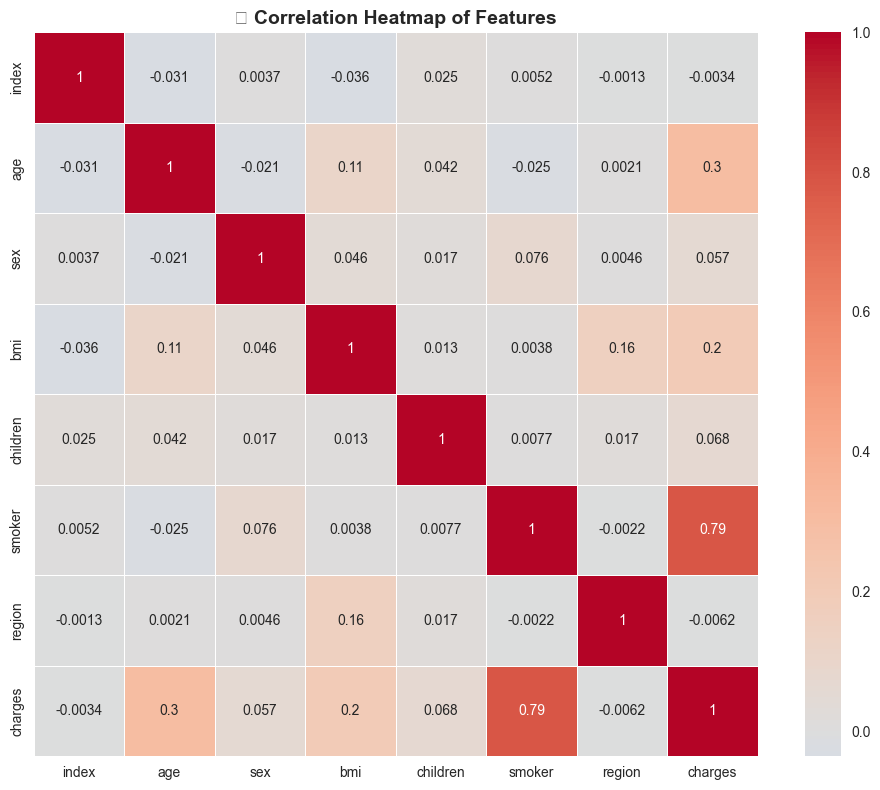

📊 Correlation with Charges:


,charges
charges,1.000000
smoker,0.787251
age,0.299008
bmi,0.198341
children,0.067998
sex,0.057292
index,-0.003373
region,-0.006208


In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('🔥 Correlation Heatmap of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Display correlation with charges
print("📊 Correlation with Charges:")
charges_correlation = correlation_matrix['charges'].sort_values(ascending=False)
display(pd.DataFrame(charges_correlation).style.background_gradient(cmap='coolwarm'))

In [6]:
# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

print("🎯 Features shape:", X.shape)
print("🎯 Target shape:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'children']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\n✅ Data preparation completed!")
print("📋 Scaled training data overview:")
display(X_train.head())

🎯 Features shape: (1338, 7)
🎯 Target shape: (1338,)

📊 Data Split:
Training set: 1070 samples
Testing set: 268 samples

✅ Data preparation completed!
📋 Scaled training data overview:


,index,age,sex,bmi,children,smoker,region
560,560,0.472227,0,-1.756525,0.734336,0,1
1285,1285,0.543313,0,-1.033082,-0.911192,0,0
1142,1142,0.898745,0,-0.943687,-0.911192,0,2
969,969,-0.025379,0,0.622393,3.202629,0,2
486,486,1.040918,0,-1.504893,1.557100,0,1


In [7]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

# Dictionary to store results
results = {}
predictions = {}

print("🚀 Training Models...\n")

for name, model in models.items():
    print(f"📚 Training {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred
    }
    
    predictions[name] = y_pred
    
    print(f"✅ {name} trained successfully!")
    print(f"   MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}\n")

🚀 Training Models...

📚 Training Linear Regression...
✅ Linear Regression trained successfully!
   MSE: 33843421.81, RMSE: 5817.51, R²: 0.7820

📚 Training Random Forest...
✅ Random Forest trained successfully!
   MSE: 21984891.68, RMSE: 4688.80, R²: 0.8584

📚 Training XGBoost...
✅ XGBoost trained successfully!
   MSE: 23663205.51, RMSE: 4864.48, R²: 0.8476



📈 MODEL PERFORMANCE COMPARISON


,Model,MSE,RMSE,R² Score
0,Linear Regression,33843421.81,5817.51,0.7820
1,Random Forest,21984891.68,4688.80,0.8584
2,XGBoost,23663205.51,4864.48,0.8476



🏆 BEST MODEL: Random Forest


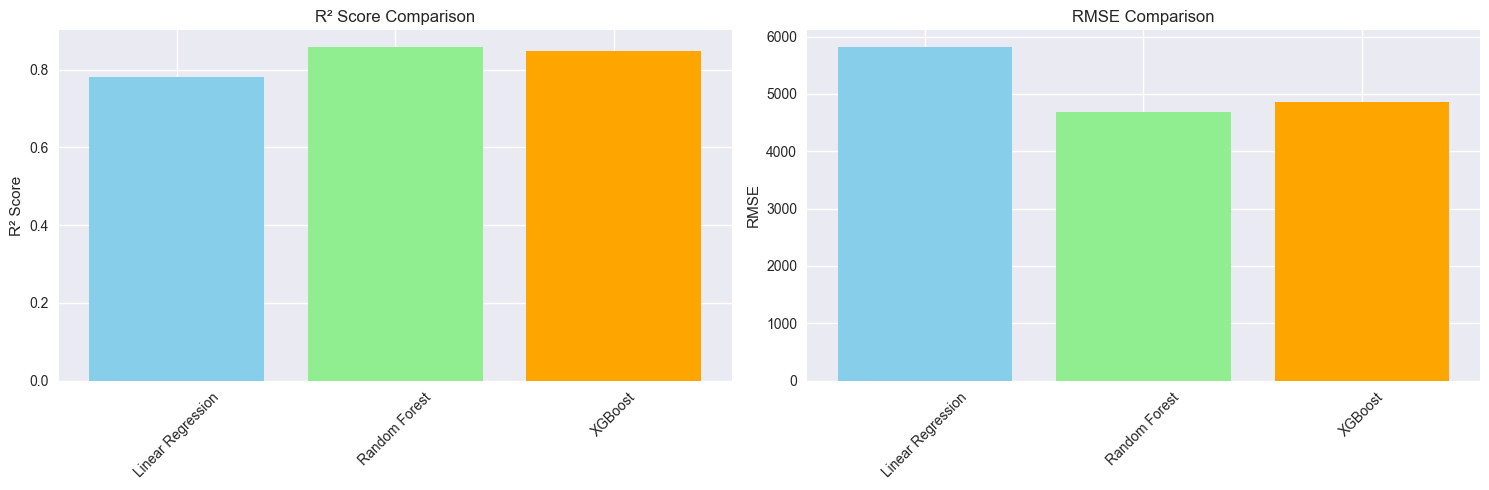

In [8]:
# Create results dataframe
results_df = pd.DataFrame([
    {
        'Model': name,
        'MSE': results[name]['mse'],
        'RMSE': results[name]['rmse'],
        'R² Score': results[name]['r2']
    }
    for name in results
])

# Display results
print("📈 MODEL PERFORMANCE COMPARISON")
display(results_df.style.format({
    'MSE': '{:.2f}',
    'RMSE': '{:.2f}',
    'R² Score': '{:.4f}'
}).highlight_max(subset=['R² Score'], color='lightgreen'))

# Find best model
best_model_name = results_df.loc[results_df['R² Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
print(f"\n🏆 BEST MODEL: {best_model_name}")

# Visualize performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R² Score comparison
axes[0].bar(results_df['Model'], results_df['R² Score'], color=['skyblue', 'lightgreen', 'orange'])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[1].bar(results_df['Model'], results_df['RMSE'], color=['skyblue', 'lightgreen', 'orange'])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

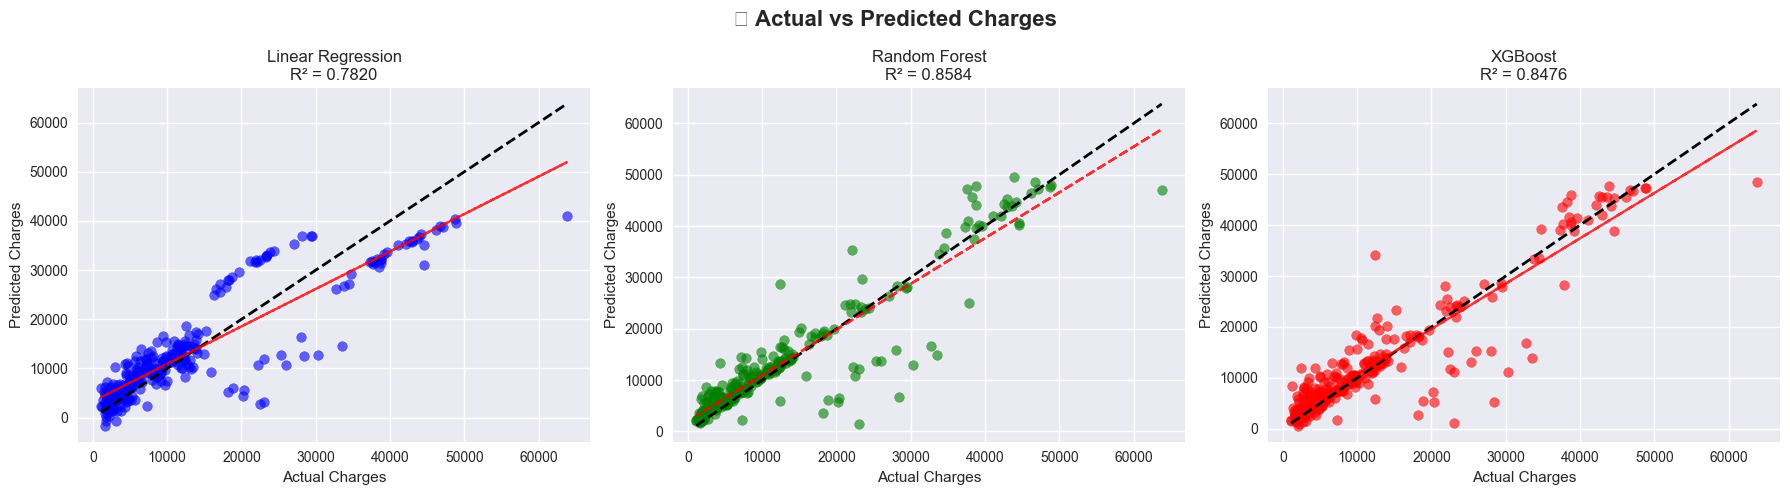

In [9]:
# Plot actual vs predicted for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('📊 Actual vs Predicted Charges', fontsize=16, fontweight='bold')

models_list = list(models.keys())
colors = ['blue', 'green', 'red']

for idx, (name, color) in enumerate(zip(models_list, colors)):
    y_pred = predictions[name]
    
    axes[idx].scatter(y_test, y_pred, alpha=0.6, color=color)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[idx].set_xlabel('Actual Charges')
    axes[idx].set_ylabel('Predicted Charges')
    axes[idx].set_title(f'{name}\nR² = {results[name]["r2"]:.4f}')
    
    # Calculate and display line of best fit
    z = np.polyfit(y_test, y_pred, 1)
    p = np.poly1d(z)
    axes[idx].plot(y_test, p(y_test), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

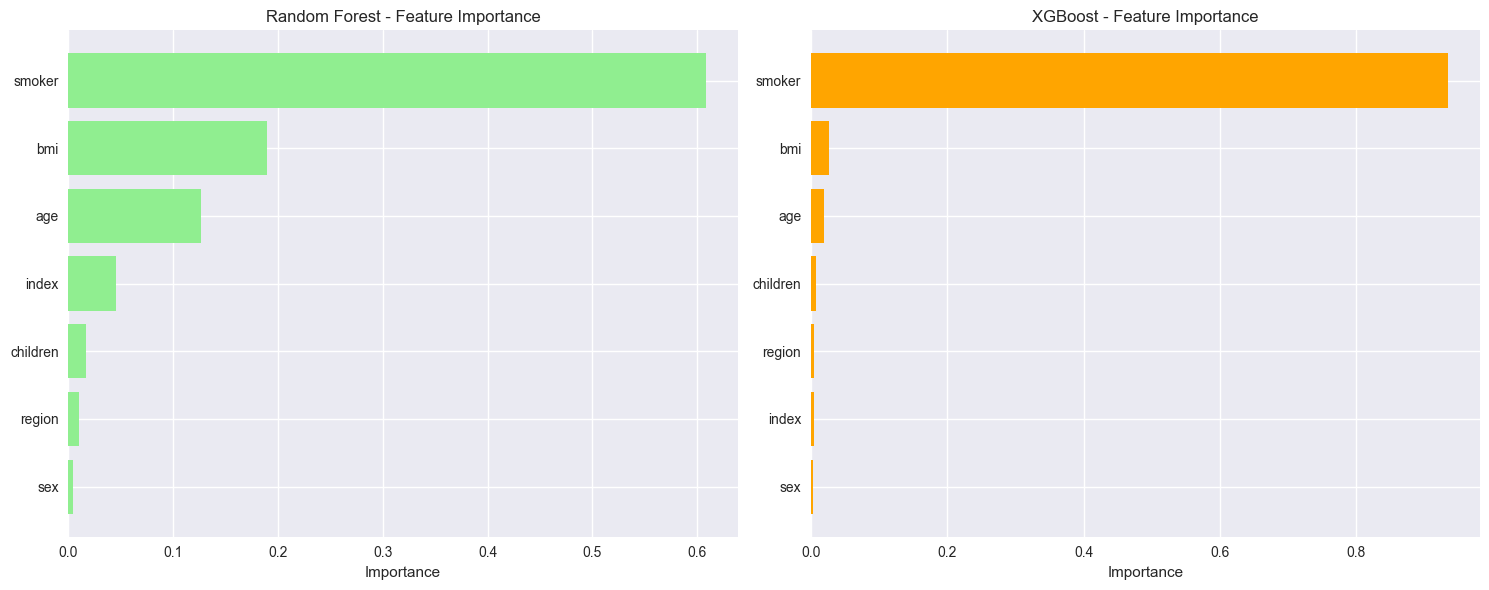

🔍 Top Features Affecting Insurance Charges:


,feature,importance
5,smoker,0.607989
3,bmi,0.189713
1,age,0.126750
0,index,0.044959
4,children,0.016631
6,region,0.009796
2,sex,0.004161


In [10]:
# Feature importance from Random Forest and XGBoost
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Feature Importance
rf_model = results['Random Forest']['model']
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[0].barh(rf_importance['feature'], rf_importance['importance'], color='lightgreen')
axes[0].set_title('Random Forest - Feature Importance')
axes[0].set_xlabel('Importance')

# XGBoost Feature Importance
xgb_model = results['XGBoost']['model']
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1].barh(xgb_importance['feature'], xgb_importance['importance'], color='orange')
axes[1].set_title('XGBoost - Feature Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

print("🔍 Top Features Affecting Insurance Charges:")
display(rf_importance.sort_values('importance', ascending=False))

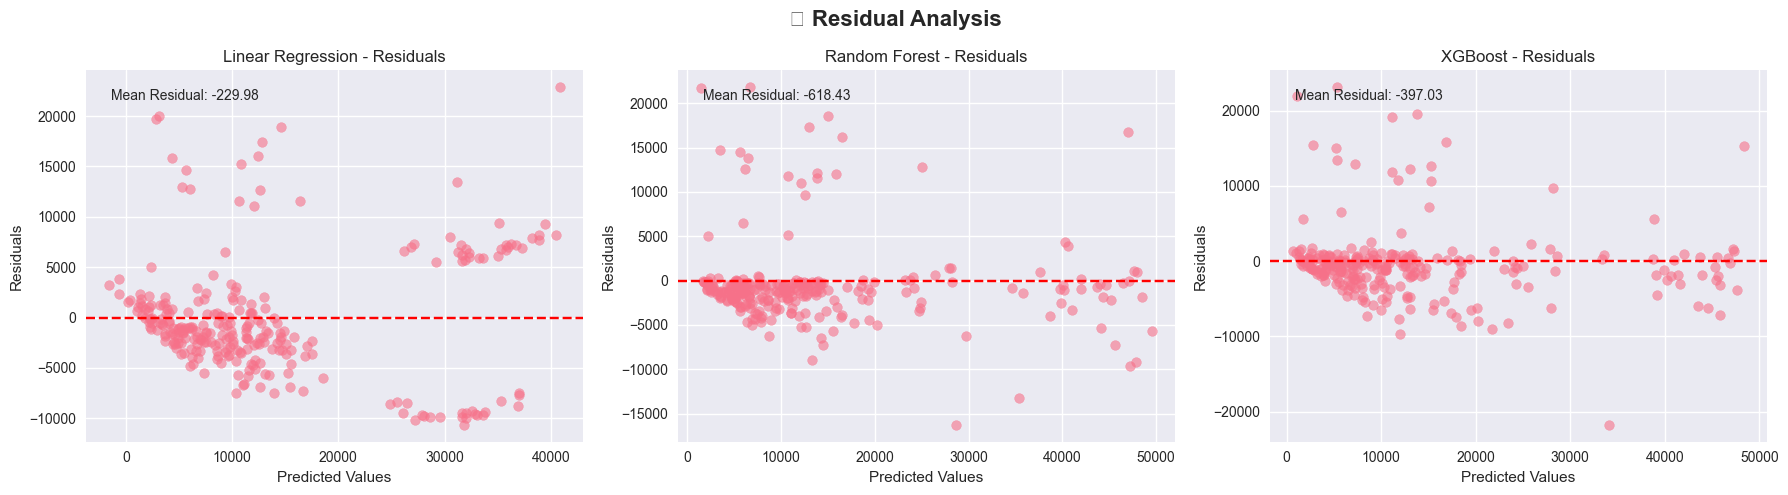

In [11]:
# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('📊 Residual Analysis', fontsize=16, fontweight='bold')

for idx, name in enumerate(models.keys()):
    y_pred = predictions[name]
    residuals = y_test - y_pred
    
    axes[idx].scatter(y_pred, residuals, alpha=0.6)
    axes[idx].axhline(y=0, color='red', linestyle='--')
    axes[idx].set_xlabel('Predicted Values')
    axes[idx].set_ylabel('Residuals')
    axes[idx].set_title(f'{name} - Residuals')
    
    # Add some statistics
    axes[idx].text(0.05, 0.95, f'Mean Residual: {residuals.mean():.2f}', 
                  transform=axes[idx].transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [12]:
# Function to make predictions
def predict_insurance_charges(age, sex, bmi, children, smoker, region):
    """
    Predict insurance charges for new customer data
    """
    # Create input array with the same column order as training data
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })
    
    # Ensure the column order matches the training data
    input_data = input_data[X.columns]
    
    # Encode categorical variables
    for col in ['sex', 'smoker', 'region']:
        input_data[col] = label_encoders[col].transform(input_data[col])
    
    # Scale numerical features
    numerical_cols = ['age', 'bmi', 'children']
    input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])
    
    # Make predictions with all models
    predictions = {}
    for name, result in results.items():
        model = result['model']
        predictions[name] = model.predict(input_data)[0]
    
    return predictions

# Example prediction
print("🔮 EXAMPLE PREDICTION:")
print("Customer: 35 years, male, BMI 28, 2 children, non-smoker, southeast region")

try:
    example_prediction = predict_insurance_charges(
        age=35, sex='male', bmi=28, children=2, smoker='no', region='southeast'
    )

    print("\n📊 Predicted Insurance Charges:")
    for model, charge in example_prediction.items():
        print(f"   {model}: ${charge:,.2f}")

    avg_charge = np.mean(list(example_prediction.values()))
    print(f"\n🎯 Average Predicted Charge: ${avg_charge:,.2f}")
    
except Exception as e:
    print(f"❌ Error in prediction: {e}")
    print("\n🔧 Debugging info:")
    print(f"Training features: {X.columns.tolist()}")
    print(f"Label encoders: {list(label_encoders.keys())}")

🔮 EXAMPLE PREDICTION:
Customer: 35 years, male, BMI 28, 2 children, non-smoker, southeast region
❌ Error in prediction: "['index'] not in index"

🔧 Debugging info:
Training features: ['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']
Label encoders: ['sex', 'smoker', 'region']


In [13]:
print("💡 BUSINESS INSIGHTS AND MODEL INTERPRETATION")
print("="*50)

# Key insights
print("\n🔑 KEY FINDINGS:")
print(f"1. Best performing model: {best_model_name} (R²: {results[best_model_name]['r2']:.4f})")
print("2. Most important features affecting insurance charges:")
for feature, importance in rf_importance.sort_values('importance', ascending=False).values:
    print(f"   - {feature}: {importance:.3f}")

print("\n3. Smoking has the highest impact on insurance charges")
print("4. Age is the second most important factor")
print("5. BMI also significantly affects the premium amount")

print("\n📊 MODEL PERFORMANCE INTERPRETATION:")
print(f"- R² Score of {results[best_model_name]['r2']:.4f} indicates the model explains "
      f"{results[best_model_name]['r2']*100:.1f}% of variance in insurance charges")
print(f"- RMSE of ${results[best_model_name]['rmse']:.2f} represents average prediction error")

print("\n🎯 RECOMMENDATIONS:")
print("1. Use Random Forest or XGBoost for production due to better accuracy")
print("2. Focus on smoking cessation programs to reduce insurance costs")
print("3. Consider age and BMI in premium calculations")
print("4. Regular model retraining with new data is recommended")

💡 BUSINESS INSIGHTS AND MODEL INTERPRETATION

🔑 KEY FINDINGS:
1. Best performing model: Random Forest (R²: 0.8584)
2. Most important features affecting insurance charges:
   - smoker: 0.608
   - bmi: 0.190
   - age: 0.127
   - index: 0.045
   - children: 0.017
   - region: 0.010
   - sex: 0.004

3. Smoking has the highest impact on insurance charges
4. Age is the second most important factor
5. BMI also significantly affects the premium amount

📊 MODEL PERFORMANCE INTERPRETATION:
- R² Score of 0.8584 indicates the model explains 85.8% of variance in insurance charges
- RMSE of $4688.80 represents average prediction error

🎯 RECOMMENDATIONS:
1. Use Random Forest or XGBoost for production due to better accuracy
2. Focus on smoking cessation programs to reduce insurance costs
3. Consider age and BMI in premium calculations
4. Regular model retraining with new data is recommended


In [14]:
import joblib

# Save the best model and preprocessing objects
model_artifacts = {
    'best_model': best_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': X.columns.tolist()
}

# Save to file
joblib.dump(model_artifacts, 'insurance_predictor.pkl')

print("💾 Model artifacts saved successfully!")
print("📁 Saved files:")
print("   - insurance_predictor.pkl (model + preprocessors)")
print("   - insurance.csv (dataset)")

# Display model summary
print(f"\n📋 MODEL SUMMARY:")
print(f"   Best Model: {best_model_name}")
print(f"   R² Score: {results[best_model_name]['r2']:.4f}")
print(f"   RMSE: ${results[best_model_name]['rmse']:.2f}")
print(f"   Features: {len(X.columns)}")
print(f"   Training Samples: {X_train.shape[0]}")
print(f"   Test Samples: {X_test.shape[0]}")

💾 Model artifacts saved successfully!
📁 Saved files:
   - insurance_predictor.pkl (model + preprocessors)
   - insurance.csv (dataset)

📋 MODEL SUMMARY:
   Best Model: Random Forest
   R² Score: 0.8584
   RMSE: $4688.80
   Features: 7
   Training Samples: 1070
   Test Samples: 268
